### Hipótese 5 (KNN)
`Matheus Raz (mrol@cin.ufpe.br)`

`João Paulo Lins (jplo@cin.ufpe.br)`

#### É possível predizer a classificação indicativa de um game baseado em seu gênero e suas vendas?

In [6]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [7]:
df = pd.read_csv('vgsalesPP2.csv')
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,Name,Platform_left,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,"mixi, Inc",responDESIGN,AO,E,E10+,EC,K-A,M,RP,T
0,Wii Sports,Wii,2006,Sports,Nintendo,1.000000,1.000000,0.368885,0.799432,1.000000,...,0,0,0,1,0,0,0,0,0,0
1,Super Mario Bros.,NES,1985,Platform,Nintendo,0.703095,0.123619,0.666341,0.072848,0.487580,...,0,0,0,1,0,0,0,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,0.379110,0.440608,0.370841,0.311258,0.430389,...,0,0,0,1,0,0,0,0,0,0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,0.377418,0.377417,0.320939,0.279092,0.397068,...,0,0,0,1,0,0,0,0,0,0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,0.272485,0.306975,1.000000,0.094607,0.380104,...,0,0,0,1,0,0,0,0,0,0
5,Tetris,GB,1989,Puzzle,Nintendo,0.560928,0.078039,0.412916,0.054872,0.366655,...,0,0,0,1,0,0,0,0,0,0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,0.272727,0.315608,0.636008,0.272469,0.361081,...,0,0,0,1,0,0,0,0,0,0
7,Wii Play,Wii,2006,Misc,Nintendo,0.337524,0.316989,0.286693,0.268685,0.350418,...,0,0,0,1,0,0,0,0,0,0
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,0.349130,0.239641,0.459883,0.211921,0.343148,...,0,0,0,1,0,0,0,0,0,0
9,Duck Hunt,NES,1984,Shooter,Nintendo,0.651112,0.021754,0.027397,0.044465,0.343027,...,0,0,0,1,0,0,0,0,0,0


In [8]:
all_sales = df.loc[:, 'NA_Sales':'Global_Sales'].copy()
all_genres = df.loc[:,'Action':'Strategy'].copy()

X = all_sales.join(all_genres).copy()
y = df["Rating"].copy()

In [9]:
knn = KNeighborsClassifier(n_neighbors=15)

#Parâmetros do KNeighborsClassifier:
#n_neighbors => Number of neighbors to use by default for kneighbors queries.

In [10]:
knn_scores = []

kf = KFold(n_splits = 20, shuffle = True, random_state = 42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    knn.fit(X_train, y_train)
    knn_scores.append(knn.score(X_test, y_test))
    
print("Média acertos da KNeighborsClassifier:",np.mean(knn_scores))

Média acertos da KNeighborsClassifier: 0.6888269065090163


Melhor resultado obtido:  0.7219512195121951


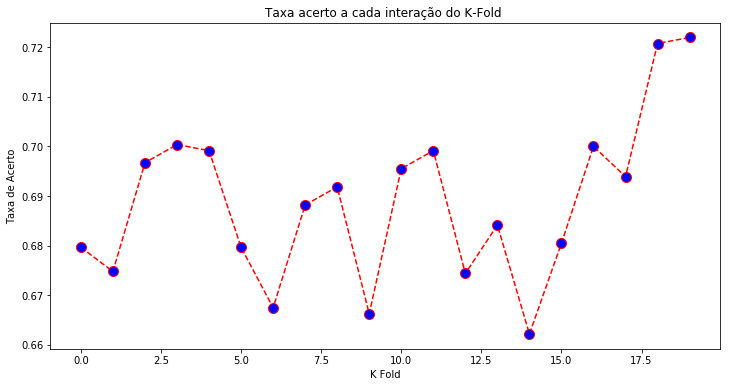

In [18]:
plt.figure(figsize=(12, 6))  
plt.plot(range(0, len(knn_scores)), knn_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Taxa acerto a cada interação do K-Fold ')  
plt.xlabel('K Fold')  
plt.ylabel('Taxa de Acerto')
print("Melhor resultado obtido: ",max(knn_scores))